

# 项目：探索AppStore移动应用数据

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索数据</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> 本项目探索的数据为AppStore的移动应用数据（数据文件由kaggle提供）。研究的问题是：1、app的价格分布情况和免费app的占比情况。2、评分与价格之间有无相关性？3、游戏类与非游戏类app的收费情况。4、游戏类与非游戏类app的评分分布差异。


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


<a id='wrangling'></a>
## 数据整理

 

### 常规属性

In [2]:
#读取数据集,做初步了解。
df_desc = pd.read_csv('applestore_description.csv')
df_app = pd.read_csv('AppleStore.csv')


In [3]:
df_desc.head(3)

,id,track_name,size_bytes,app_desc
0,281656475,PAC-MAN Premium,100788224,"SAVE 20%, now only $3.99 for a limited time!\n..."
1,281796108,Evernote - stay organized,158578688,Let Evernote change the way you organize your ...
2,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,Download the most popular free weather app pow...


In [4]:
df_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 4 columns):
id            7197 non-null int64
track_name    7197 non-null object
size_bytes    7197 non-null int64
app_desc      7197 non-null object
dtypes: int64(2), object(2)
memory usage: 225.0+ KB


In [5]:
df_app.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [6]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


In [7]:
df_app.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


在初步了解数据集的含义，以及其中所包含的具体内容之后，我们可以有一个大概的
思路或者直觉，提出自己感兴趣的问题，比如说：

● 这些 APP 的价格分布如何，免费应用所占比例是多少？

● 总评分与价格有没有相关性？

● APP 的分类收费情况？

● 各个分类的评分分布差异？

针对提出的问题，以及对数据的更详细的评估，我们可以对数据进行以下处理:

● 将 df_desc 中的 app_desc 列合并到 df_app 中

● 删除不需要的数据列（'Unnamed: 0','currency','vpp_lic'）

● 将列名中的 . 修改为 _

● 对 prize 进行 cut 分段，创建新的分类变量 price_cut

In [8]:
df = pd.merge(df_app, df_desc[['id','app_desc']], on = 'id')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7197 entries, 0 to 7196
Data columns (total 18 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
app_desc            7197 non-null object
dtypes: float64(3), int64(9), object(6)
memory usage: 1.0+ MB


In [9]:
df.drop(['Unnamed: 0','currency','vpp_lic'],axis=1,inplace=True)

In [10]:
df = df.rename(columns ={c:c.replace('.','_') for c in df_app.columns})
df.columns

Index(['id', 'track_name', 'size_bytes', 'price', 'rating_count_tot',
       'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver',
       'cont_rating', 'prime_genre', 'sup_devices_num', 'ipadSc_urls_num',
       'lang_num', 'app_desc'],
      dtype='object')

In [11]:
price_labels = ['Free','USD:0~5','USD:5~20','USD:20+']
df['price_cut'] = pd.cut(df['price'],bins=[-1,0,5,20,300],labels=price_labels)

In [12]:
df['price_cut'].value_counts()

Free        4056
USD:0~5     2703
USD:5~20     402
USD:20+       36
Name: price_cut, dtype: int64

In [13]:
df.prime_genre.value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

现在我们已经完成了数据整理的操作，对数据的了解更深入了，这个时候可以对提出的问题进行迭代（对问题的迭代可能发生在任何一步中），可能会提出更有价值的问题。
比如在探索了 prime_genre 之后了解到游戏类应用占据了数据集的 53.7%，其他分类的类型很多，但是每个类别中数量较少，所以将关于分类的问题修改为游戏类与非游戏类的对比。
迭代后的问题：

● 游戏类与非游戏类 APP 的收费情况？

● 游戏类与非游戏类 APP 的评分分布差异？

In [14]:
df['is_Game'] = df['prime_genre']=='Games'
df['is_Game'].replace([True,False],['Games','Not_Games'],inplace=True)

In [15]:
df['is_Game'].value_counts()

Games        3862
Not_Games    3335
Name: is_Game, dtype: int64

<a id='eda'></a>
## 探索数据


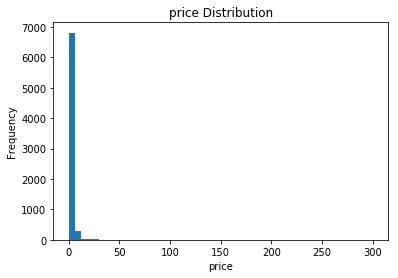

In [16]:
df['price'].plot.hist(bins = 50)
plt.title('price Distribution')
plt.ylabel('Frequency')
plt.xlabel('price');

直方图可以修改 bins 参数控制图中bar 的数量，可以看出 price 是非常偏斜的状态。

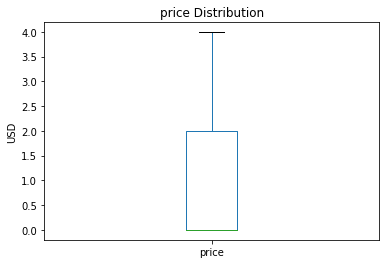

In [30]:
df['price'].plot.box(showfliers=False,figsize=(6,4))
plt.title('price Distribution')
plt.ylabel('USD');


使用箱线图将离群值隐藏之后，可以发现大部分的价格都在 5 美元以下。

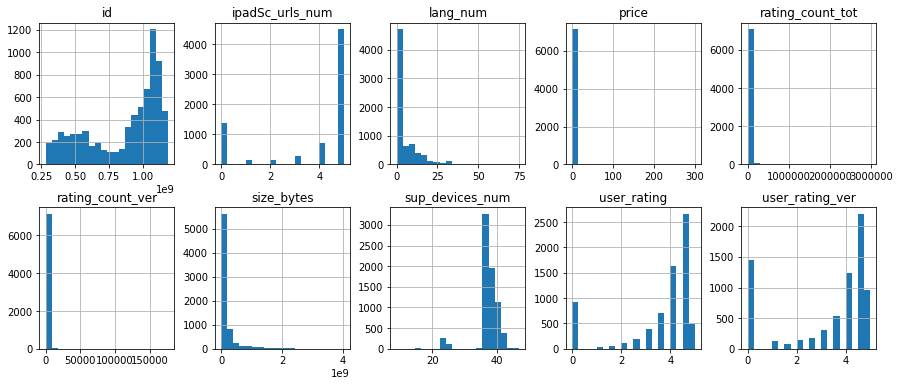

In [18]:
df.hist(figsize=(15,6),layout=(2,5),bins=20);

图中可以看到，有一些数值类型的数据是离散型的。

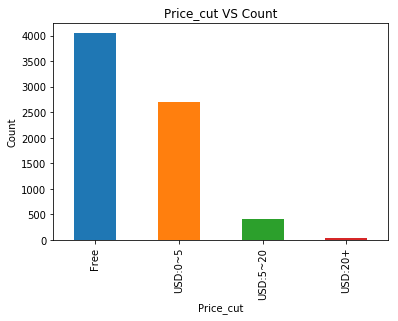

In [19]:
df.price_cut.value_counts().plot.bar(figsize=(6,4))
plt.title('Price_cut VS Count')
plt.ylabel('Count')
plt.xlabel('Price_cut');

图中可以明确看到分类变量各个类别的数量对比，在价格段：price_cut 这列数据中，占据绝大多数的类别是免费和5元以下。

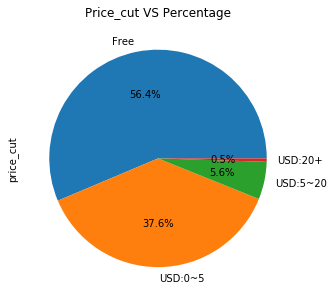

In [20]:
df.price_cut.value_counts().plot.pie(autopct='%.1f%%',figsize=(5,5))
plt.title('Price_cut VS Percentage');

在饼图中可以看到各个类别所占比例，免费应用占据一半以上。

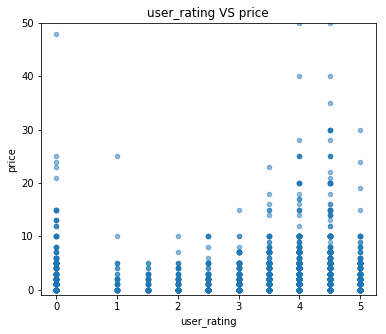

In [21]:
df.plot.scatter(x='user_rating',y='price',alpha=.5,figsize=(6,5))
plt.title('user_rating VS price')
plt.ylim(-1,50);

本次示例的数据集中，price 的分布存在一些极端值，所以使用 ylim 做了限制；因为 user_rating 实际上是离散数值，所以出现了一条一条的散点分布情况。

图中没有办法观察出明显的相关趋势

In [22]:
#在探索相关性时，如果散点图给出的趋势不明显，还可以借助相关系数来获得更加明确的探索方向
df.corr()

,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices_num,ipadSc_urls_num,lang_num
id,1.000000,0.077486,-0.075247,-0.201976,-0.072784,-0.185178,-0.109849,0.033605,0.052082,-0.128932
size_bytes,0.077486,1.000000,0.182392,0.004486,0.006337,0.066256,0.086075,-0.118347,0.152697,0.004614
price,-0.075247,0.182392,1.000000,-0.039044,-0.018012,0.046601,0.025173,-0.115361,0.066100,-0.006713
rating_count_tot,-0.201976,0.004486,-0.039044,1.000000,0.163645,0.083310,0.088744,0.008832,0.015734,0.137675
rating_count_ver,-0.072784,0.006337,-0.018012,0.163645,1.000000,0.068754,0.077840,0.037951,0.024333,0.013287
user_rating,-0.185178,0.066256,0.046601,0.083310,0.068754,1.000000,0.774140,-0.042451,0.265671,0.170976
user_rating_ver,-0.109849,0.086075,0.025173,0.088744,0.077840,0.774140,1.000000,-0.018901,0.275737,0.175580
sup_devices_num,0.033605,-0.118347,-0.115361,0.008832,0.037951,-0.042451,-0.018901,1.000000,-0.037728,-0.041681
ipadSc_urls_num,0.052082,0.152697,0.066100,0.015734,0.024333,0.265671,0.275737,-0.037728,1.000000,0.088378
lang_num,-0.128932,0.004614,-0.006713,0.137675,0.013287,0.170976,0.175580,-0.041681,0.088378,1.000000


可以看到这些数值变量之间，只有 user_rating 和 user_rating_ver 之间的相关系数比较大，其他都没有超过 0.3 的情况。其他变量之间的线性相关性不大，我们使用其他可视化探索一下有没有其他数据规律。

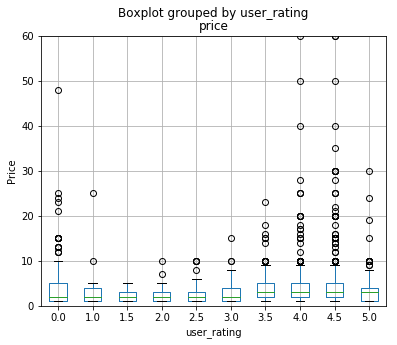

In [23]:
df[df['price']>0].boxplot(column=['price'],by='user_rating',figsize=(6,5))
plt.ylim(0,60)
plt.ylabel('Price');

可以从图中看到，价格较高的一些离群值出现在3.5分以上的评分中比较多，0分的情况下，也比1~3分的情况下要多。看箱线区域，0分也与3.5~4.5的评分分布类似。这个现象比较有趣，猜测可能如果是价格较高的APP，如果让用户失望，可能会更倾向于评0分，而不是一些中间的分数。

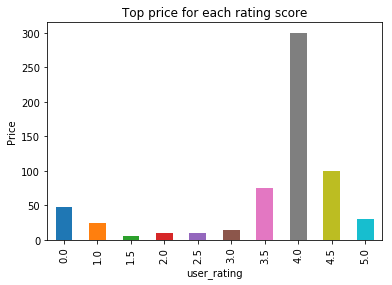

In [24]:
df.groupby('user_rating')['price'].max().plot.bar()
plt.title('Top price for each rating score')
plt.ylabel('Price');

每个评分的最大值探索，可以看到，最高价格的几个 APP 都分布在0分以及 3.5 分以上。与箱线图的结论相似。

In [25]:
#探索游戏应用与非游戏应用的价格差异，可以使用组合柱状图进行对比。下图代码中的 unstack 将数据由双索引的结构转换为宽格式的数据
df.groupby(['price_cut','is_Game']).size().unstack()

is_Game,Games,Not_Games
price_cut,,
Free,2257,1799
USD:0~5,1372,1331
USD:5~20,230,172
USD:20+,3,33


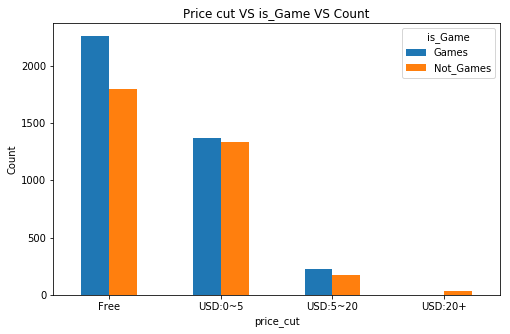

In [26]:
df.groupby(['price_cut','is_Game']).size().unstack().plot.bar(figsize=(8,5))
plt.title('Price cut VS is_Game VS Count')
plt.xticks(rotation=0)#控制X轴刻度文字的角度
plt.ylabel('Count');

从图中可以看出，免费应用中游戏应用比例较高，非免费应用的分布较为接近。

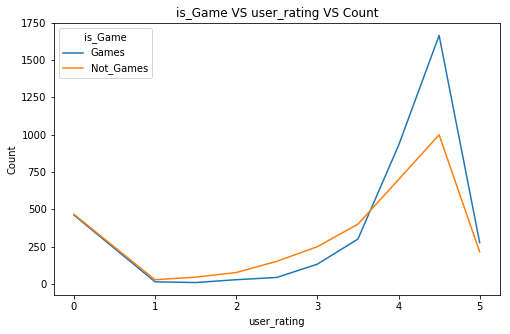

In [27]:
df.groupby(['user_rating','is_Game']).size().unstack().plot(figsize=(8,5))
plt.title('is_Game VS user_rating VS Count')
plt.ylabel('Count');

图中可以看出，在 3.5 分之前，都是非游戏应用较多， 3.5 分之后则是游戏应用较多。

<a id='conclusions'></a>
## 结论

 **总结**：
 
 1.所有APP中，大部分都小于5美元。免费应用占比为54.6%，占据一半以上。

 2.经过相关系数的计算，可以看到价格和评分没有明显的线性相关性，再深入探索后，可以发现价格高的app的评分比较极端，0或者3.5分以上。猜测可能如果是价格较高的app，如果让用户失望，可能会更倾向于评0分，而不是一些中间的分数。

 3.免费应用中游戏应用比例较高，非免费应用中，游戏与非游戏类应用的比例比较相似。

 4.游戏/非游戏应用与评分的关系：在3.5分之前，都是非游戏应用较多，3.5分之后则是游戏应用较多。

**局限性**：

1.当前探索的问题主要集中在价格，评分，游戏分类这些特征，其他特征没有进行过多的探索。

2.根据对APP商店的了解，一些新上架的应用，评价应该会比较少，有可能有一些偶然情况不能了解到，评分结合评分人数应该会有更加准确的信息。

3.本次分析的过程只是使用了可视化探索和一些简单的统计计算，没有进行任何显著性检验，所以目前的结论只是暂时的，还有进一步分析的可能性。

